# Лабораторная работая №8
## Применение ансамблевых моделей на базе решающих деревьев в задачах классификации
### Гончаров Ян

Задачи к лабораторной работе:
1.	Решить задачу классификации  больных методом случайного леса.
	Провевести исследование качества модели от глубины используемых деревьев. Отрисовать зависимость на графике
	Провести исследование качества модели от количества подаваемых на дерево признаков. Отрисовать зависимость на графике
	Провести исследование качества модели от числа деревьев. Отрисовать на графике, дополнить  график данными  о времени обучения.
2.	Решить задачу клаисификации с использованием XGBoost. Исследовать время обучения, качество полученных результатов. Сравнить с данными полученными в п.1 и сделать выводы (в работе).


#### Загрузим датасет диабетиков

In [14]:
import pandas as pd

data = pd.read_csv("diabetes.csv")

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Решим задачу классификации больных методом случайного леса

Как мы выяснили в прошлых лабораторных, одно решающее дерево имеет невысокое качество классификации, поэтому используя именно лес деревьев мы можем значительно улучшить его результаты

А так же исследуем влияние на модель:
1. Глубины каждого дерева
2. Количества подаваемых на дерево признаков
3. Числа деревьев

#### Начнём с глубины деревьев:

[0.7895408163265306, 0.7971938775510203, 0.7940962099125364, 0.796100583090379, 0.7729591836734694, 0.7722303206997084, 0.7744169096209912, 0.7693148688046647, 0.7702259475218659, 0.775783527696793, 0.7642128279883381, 0.7616618075801749, 0.757015306122449, 0.7636661807580175, 0.7564686588921283, 0.7540998542274052, 0.7653061224489797, 0.7579263848396501, 0.7626639941690962, 0.7518221574344023, 0.7548287172011662, 0.762390670553936, 0.7573797376093294, 0.7667638483965015, 0.7704081632653061, 0.7615706997084548, 0.763210641399417] 

[0.5, 0.5178571428571429, 0.5178571428571429, 0.5178571428571429, 0.5178571428571429, 0.5535714285714286, 0.5714285714285714, 0.5892857142857143, 0.5357142857142857, 0.5714285714285714, 0.5535714285714286, 0.5178571428571429, 0.5178571428571429, 0.5535714285714286, 0.5357142857142857, 0.5178571428571429, 0.5357142857142857, 0.5535714285714286, 0.5535714285714286, 0.5357142857142857, 0.5714285714285714, 0.5178571428571429, 0.5357142857142857, 0.51785714285714

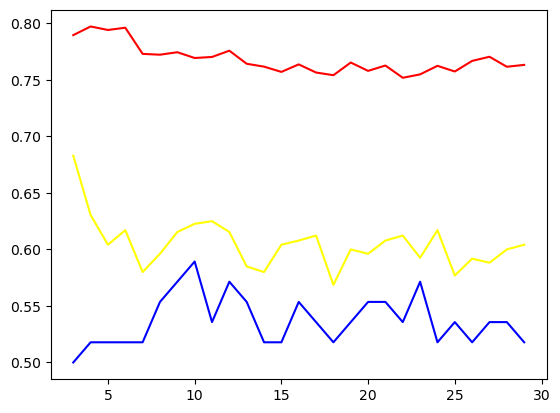

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

depth_range = np.arange(3, 30)

roc_auc_points = []
recall_points = []
precision_points = []

for depth in depth_range:
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    recall_points.append(recall_score(y_test, y_pred))
    precision_points.append(precision_score(y_test, y_pred))
    roc_auc_points.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

print(roc_auc_points, "\n")
print(recall_points, "\n")
print(precision_points, "\n")

plt.plot(depth_range, roc_auc_points, color='red')
plt.plot(depth_range, recall_points, color='blue')
plt.plot(depth_range, precision_points, color='yellow')

plt.show()

Из графиков можно видеть, что глубина деревьев не так сильно влияет на точность модели

#### Исследуем влияние количества признаков на одно дерево

[0.7428935860058309, 0.7614795918367349, 0.7647594752186588, 0.7581086005830904, 0.7513666180758019, 0.761752915451895, 0.7536443148688047] 

[0.5, 0.5357142857142857, 0.5892857142857143, 0.5535714285714286, 0.5, 0.5178571428571429, 0.5892857142857143] 

[0.5957446808510638, 0.6122448979591837, 0.6111111111111112, 0.5849056603773585, 0.56, 0.58, 0.5892857142857143] 



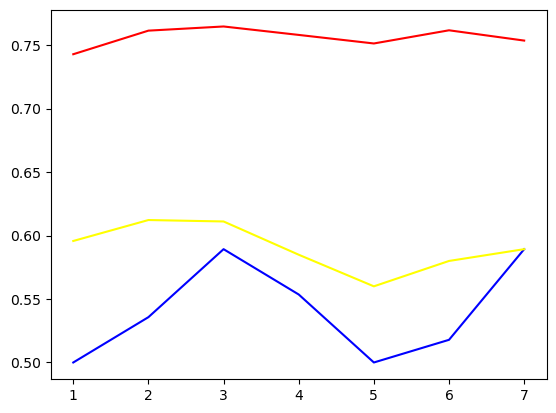

In [16]:
features_count = X.shape[1]
features_range = np.arange(1, features_count)

roc_auc_points = []
recall_points = []
precision_points = []

for features in features_range:
    clf = RandomForestClassifier(max_features=features)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    recall_points.append(recall_score(y_test, y_pred))
    precision_points.append(precision_score(y_test, y_pred))
    roc_auc_points.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

print(roc_auc_points, "\n")
print(recall_points, "\n")
print(precision_points, "\n")

plt.plot(features_range, roc_auc_points, color='red')
plt.plot(features_range, recall_points, color='blue')
plt.plot(features_range, precision_points, color='yellow')

plt.show()

Видно, что качество модели падает при большом количестве подаваемых признаков на одно дерево

#### И исследуем влияние количества деревьев в лесу

[0.71091472303207, 0.6733782798833818, 0.6786625364431487, 0.7192966472303206, 0.7417091836734695, 0.7224854227405247, 0.7305940233236152, 0.7537354227405249, 0.74216472303207, 0.7407981049562682, 0.745262390670554, 0.7315962099125365, 0.7201166180758019, 0.7341472303206997, 0.7241253644314869, 0.7325983965014577, 0.7413447521865889, 0.7336916909620992, 0.7466290087463556, 0.7395225947521866, 0.7536443148688047, 0.7767857142857142, 0.7612973760932944, 0.7575619533527698, 0.7667638483965014, 0.7400692419825073, 0.7706814868804663, 0.7359693877551019, 0.745262390670554, 0.7404336734693878, 0.7506377551020408, 0.7530065597667638, 0.7498177842565598, 0.7537354227405249, 0.7408892128279883, 0.7649416909620991, 0.7512755102040817, 0.7515488338192419, 0.7612973760932946, 0.7642128279883381, 0.7754190962099125, 0.7592930029154519, 0.7584730320699709, 0.7565597667638483, 0.7571975218658893, 0.760932944606414, 0.7660349854227406, 0.7706814868804664, 0.7711370262390671, 0.756286443148688, 0.75546

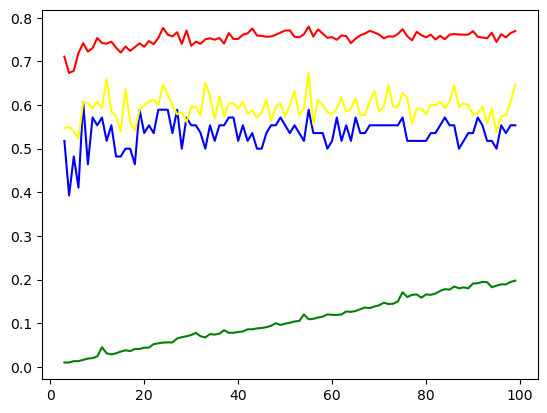

In [19]:
import time

trees_range = np.arange(3, 100)

roc_auc_points = []
recall_points = []
precision_points = []
time_points = []

for trees in trees_range:
    clf = RandomForestClassifier(n_estimators=trees)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    y_pred = clf.predict(X_test)

    time_points.append(end - start)
    recall_points.append(recall_score(y_test, y_pred))
    precision_points.append(precision_score(y_test, y_pred))
    roc_auc_points.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

print(roc_auc_points, "\n")
print(recall_points, "\n")
print(precision_points, "\n")

plt.plot(trees_range, roc_auc_points, color='red')
plt.plot(trees_range, recall_points, color='blue')
plt.plot(trees_range, precision_points, color='yellow')

plt.plot(trees_range, time_points, color = 'green')

Можно заметить что при количестве деревьев равном 15 и дальше точность модели выходит на плато и уже сильно не изменяется. Разве что в рамках погрешности

## Решим задачу классификации с помощью XGBoost
XGBoost - один из самых популярных и эффективных реализаций алгоритма бустинга

In [18]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators = 15)
start = time.time()
bst.fit(X_train, y_train)
end = time.time()
y_pred = bst.predict(X_test)

print("XGBoost:")
print("Recall score: ", recall_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred))
print("Roc auc score: ", roc_auc_score(y_test, y_pred))
print("Time: ", end - start)

print("\nNo XGBoost:")
print("Recall score: ", recall_points[15])
print("Precision score: ", precision_points[15])
print("Roc auc score: ", roc_auc_points[15])
print("Time: ", time_points[15])

XGBoost:
Recall score:  0.5535714285714286
Precision score:  0.543859649122807
Roc auc score:  0.6441326530612245
Time:  0.019998550415039062

No XGBoost:
Recall score:  0.5178571428571429
Precision score:  0.5178571428571429
Roc auc score:  0.7311406705539358
Time:  0.03696942329406738


Как минимум XGBoost работает быстрее, хотя его точность находится в рамках погрешности от обычных деревьев